## 보스턴 집값 예측

<img src="assets/boston.png">

- 1970년대 매사추세츠주 보스턴에서 우리가 부동산 개발 회사에서 일하고 있다고 기장헤보자. 주거지 프로젝트를 시작하기 전에 평가해 보려고 한다. 우리는 아래와 같이 집의 특성에 따라 가격 견적서를 제공하는 모델을 만들어야 한다.
    - 방의 개수
    - 고용 센터까지의 거리
    - 지역의 경제력 수준
    - 지역 학교의 교사당 학생 수 등

- 우리가 이번 시간을 통해 배우거나 작업할 사항은 아래와 같다. 
    1. 보스턴 집의 가격 데이터를 분석, 연구
    2. 데이터를 훈련용과 테스트용으로 나누기
    3. 다변수 회귀 분석을 수행
    4. 모델의 계수와 잔차 평가
    5. 모델 성능을 개선하기 위해 데이터 변환 사용
    6. 모델을 이용해 부동산 가격을 감정
    
<img src="assets/model.png">

In [1]:
# 필요 모듈 임포트 
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## 데이터 불러오기

In [4]:
# 데이터 불러오기
data = pd.read_csv('data/boston.csv', index_col=0)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 데이터 탐색

### 1. 기본 데이터 탐색

In [5]:
# 데이터 형태 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [6]:
# 결측치 확인 
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
# 중복값 확인 
data[data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


- 1차 데이터 탐색 결과는 아래와 같다 
    - 총 데이터 값 506건 / 컬럼수 14건 
    - 데이터 정보 
        - CRIM(float): 도시별 1인당 범죄율
        - ZN(float): 25,000 평방 피트를 초과하는 부지로 지정된 주거용 토지의 비율
        - INDUS(float): 도시당 비소매 사업 면적 비율
        - CHAS(float): Charles River 더미 변수(= 지역 경계가 강인 경우 1, 그렇지 않은 경우 0)
        - NOX(float): 산화질소 농도(1,000만분의 1)
        - RM(float): 주택당 평균 방 개수
        - AGE(float): 1940년 이전에 건축된 자가 거주 주택의 비율
        - DIS(float): 보스턴 고용 센터 5곳까지의 가중치 거리에 가중치 부여
        - RAD(float): 방사형 고속도로에 대한 접근성 지수
        - TAX(float): `$10,000`당 전체 재산세율
        - PTRATIO(float): 마을별 학생-교사 비율
        - B(float): 1000(Bk - 0.63)^2 여기서 Bk는 마을별 흑인 비율
        - LSTAT(float): 인구의 낮은 지수
        - PRICE(float): 자가 거주 주택의 평균 가치(`$1000`)
    - 데이터 중복값과 NaN 값은 없음 

### 2. 통계적 수치 탐색
- 다음 질문에 답해보기 
    - 교사 1인당 평균 학생 수는 몇 명인가?
    - 데이터세트에 있는 주택의 평균 가격은 얼마인가?
    - CHAS 기능이 무엇인가?
    - 데이터 세트에서 주거지당 최대 및 최소 방 수는 얼마인가?

In [8]:
# 통계 수치 확인 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# 교사 1인당 평균 학생 수는 몇 명일까? 
print(f'교사 1인당 평균 학생 수는: {data.PTRATIO.mean()}')

# 주택의 평균 가격은 얼마인가?
print(f'주택의 평균 가격은: {data.PRICE.mean() * 1000}')

# 주거지당 최대 및 최소 방 개수는 얼마인가? 
print(f'주거지당 최소 방의 개수는: {data.RM.min()}, 주거지당 최대 방의 개수: {data.RM.max()}')

교사 1인당 평균 학생 수는: 18.455533596837945
주택의 평균 가격은: 22532.806324110676
주거지당 최소 방의 개수는: 3.561, 주거지당 최대 방의 개수: 8.78


- 교사 1인당 평균 학생 수는 약 18명이다.
- 주택의 평균 가격은 22,532 달러이다. 이후 인플레이션 영향으로 집값은 더 상승 했을 것이다,  
- CHAS의 기능은 무엇인가? CHAS는 집이 찰스 강 옆에 있는지 여부를 보여준다. 해당 값이 0 또는 1값만 있는데, 이런 종류의 특성을 더미 변수라고도 한다. 

<img src="assets/Longfellow_pru.jpg">

기능 시각화
과제: 몇 가지 기술 통계를 살펴본 후 모델에 대한 데이터를 시각화합니다. Seaborn의 .displot()을 사용하여 막대 차트를 만들고 다음 변수에 대해 KDE(Kernel Density Estimate)를 겹쳐 놓습니다.

가격: 주택 가격(단위: 천)입니다.
RM: 소유자 단위당 평균 객실 수입니다.
DIS: 보스턴 고용 센터 5개까지의 가중 거리, 즉 예상 통근 길이.
RAD: 고속도로 접근성 지수.
더 나은 사진을 얻으려면 화면비 매개변수를 2로 설정해 보세요.

데이터 분포에서 무엇을 발견했나요?

### 3. 데이터 시각화
- 데이터 시각화 기준 데이터들 
    - PRICE: 주택 가격(단위: 천)
    - RM: 소유자 단위당 평균 객실 수
    - DIS: 보스턴 고용 센터 5개까지의 가중 거리, 즉 예상 통근 길이
    - RAD: 고속도로 접근성 지수
    - CHAS: 찰스강 옆에 집이 있는지 여부 

#### PRICE - 주택 가격 

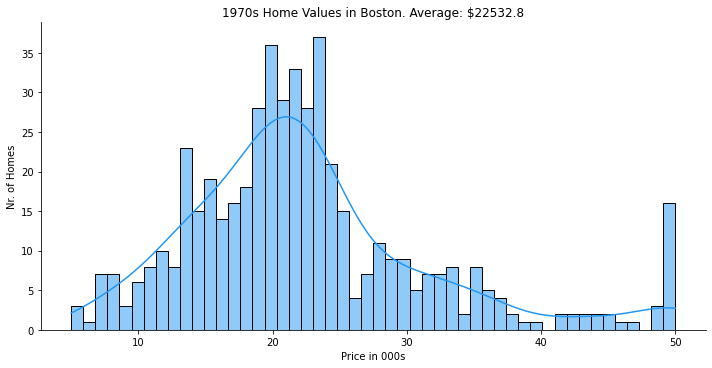

In [30]:
# 주택 가격 기준 히스토그램 출력
sns.displot(data=data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

- 5맨 오른쪽 끝부분 50,000불 지점에서 주택 수가 급증한 것을 알 수 있다.

#### DIS - 보스턴 고용 센터 5개까지의 가중 거리, 즉 예상 통근 길이

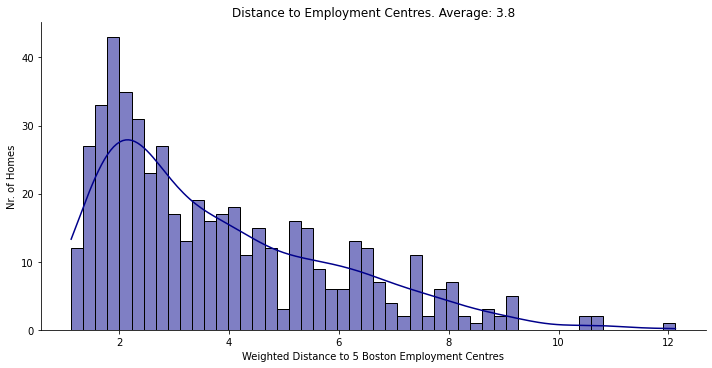

In [33]:
sns.displot(data=data['DIS'], 
            bins=50, 
            aspect=2,
            kde=True,
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

- 대부분 집은 직장에서 3.8 마일(6.12km) 떨어져 있다. 멀리 갈수록 집이 점점 줄어들고 있다,

#### RM - 소유자 단위당 평균 객실 수

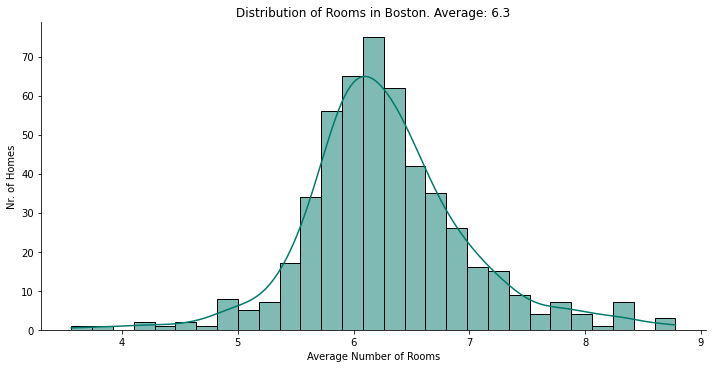

In [35]:
sns.displot(data=data['RM'], 
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### RAD - 고속도로 접근성 지수 

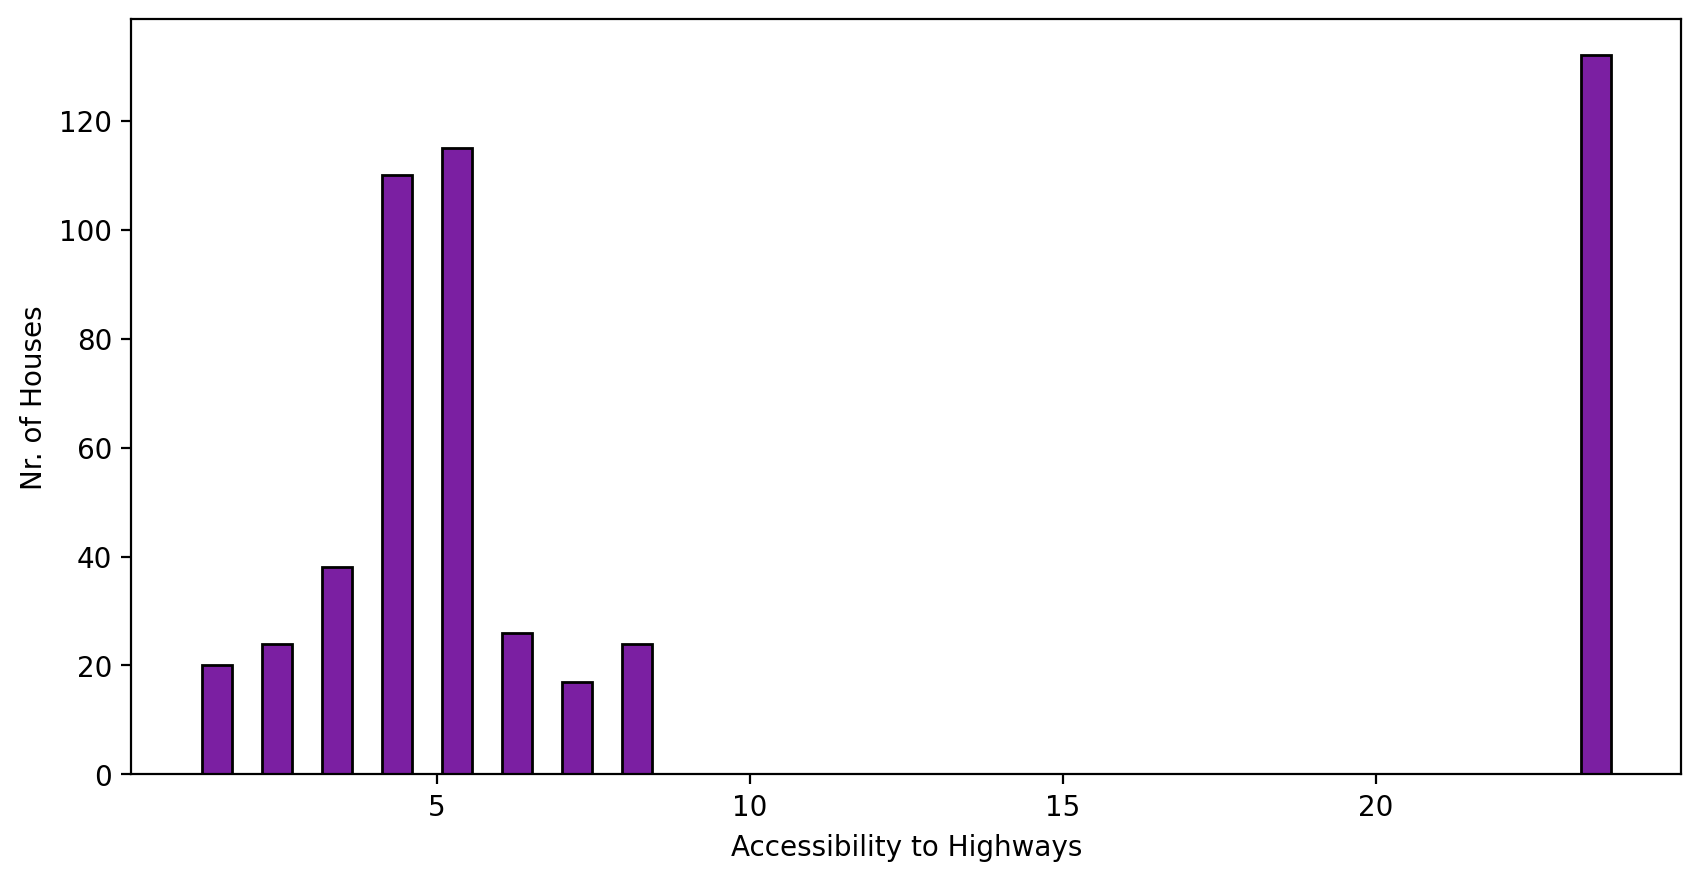

In [50]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

- RAD는 도로 접근성 지수이다. 고속도로에 더 나은 접근성이 높은 숫자로 나타난다. 지수의 가치에는 크게 차이가 없다.

#### 집 위치가 찰스 강 옆인지 아닌지?

In [64]:
cha_count = data.CHAS.value_counts()

cha_count.index = ['No' if idx == 0 else 'Yes' for idx in cha_count.index]

fig = px.bar(cha_count, 
             x=cha_count.index,
             y=cha_count.values,
             labels={'x': 'Property Located Next to the River?', 'y': 'Number of Houses'},
             color=cha_count.index,
             color_discrete_map={'No': '#FFD700', 'Yes':'#FF8C00'},
             title='Next to Charles River?')

fig.show()

- 찰스 강 옆에 집은 소수가 가지고 있었다. 아무래도 강 옆의 집값이 대체적으로 비싸기 때문이다.